# Chapter 5
Statistics 

In [0]:
from __future__ import division
from collections import Counter
import math
import matplotlib.pyplot as plt

In [0]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


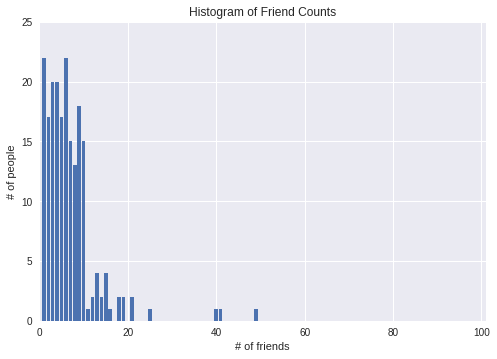

In [4]:
friend_counts = Counter(num_friends)
xs = range(100)
ys = [friend_counts[x] for x in xs]
plt.axis([0, 101, 0, 25])
plt.bar(xs,ys)
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()
 

In [5]:
num_points = len(num_friends)
num_points

204

In [6]:
largest_value = max(num_friends) 
smallest_value = min(num_friends)
print(largest_value)
print(smallest_value)

100
1


In [0]:
sorted_values = sorted(num_friends)

In [8]:
smallest_value = sorted_values[0] 
print(smallest_value)
second_smallest_value = sorted_values[1]
print(second_smallest_value)
second_largest_value = sorted_values[-2]

1
1


In [9]:
def mean(x):
  return sum(x) / len(x)
mean(num_friends) 

7.333333333333333

In [10]:
def median(v):
  """finds the 'middle-most' value of v"""
  n = len(v)
  sorted_v = sorted(v)
  midpoint = n // 2
  if n % 2 == 1:
    # if odd, return the middle value
    return sorted_v[midpoint]
  else:
    # if even, return the average of the middle values
    lo = midpoint - 1
    hi = midpoint
    return (sorted_v[lo] + sorted_v[hi]) / 2
median(num_friends) # 6.0

6.0

In [0]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [12]:
print(quantile(num_friends, 0.10)) 
print(quantile(num_friends, 0.25)) # 3
print(quantile(num_friends, 0.75)) # 9
print(quantile(num_friends, 0.90))

1
3
9
13


In [13]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)
interquartile_range(num_friends) # 6

6

In [0]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]


In [15]:
mode(num_friends)

[6, 1]

In [16]:
def data_range(x):
  return max(x) - min(x)
data_range(num_friends) # 99

99

In [17]:
def de_mean(xs):
    mu = mean(xs)
    return ((x-mu) for x in xs)

def variance(xs):
    mu = mean(xs)
    n = len(xs)
    return sum((x-mu)**2 for x in xs) / (n-1)
variance(num_friends) # 81.54


81.54351395730716

In [18]:
def standard_deviation(x):
  return math.sqrt(variance(x))
standard_deviation(num_friends) # 9.03

9.03014473623248

In [0]:
from keras.layers import *  
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
daily_minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x),de_mean(y)) / (n-1)


In [0]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero


In [0]:
outlier = num_friends.index(100) # index of outlier
num_friends_good = [x 
                    for i, x in enumerate(num_friends)
                    if i != outlier]
daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes) 
                      if i != outlier]


# Chapter 6 
Probability 

In [0]:
import random

In [0]:
def random_kid():
    return random.choice(["boy", "girl"])

In [0]:
both_girls = 0
older_girl = 0
either_girl = 0
n = 10000

random.seed(0)
for _ in range(n):
    younger = random_kid()
    older = random_kid()

    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

In [0]:
print("P(both):", both_girls/n)
print("P(older):", older_girl/n)
print("P(either):", either_girl/n)

P(both): 0.2472
P(older): 0.4937
P(either): 0.7464


In [0]:
def uniform_pdf(x):
  return 1 if x >= 0 and x < 1 else 0

In [0]:
def uniform_cdf(x):
  "returns the probability that a uniform random variable is <= x"
  if x < 0: return 0 # uniform random is never less than 0
  elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
  else: return 1 # uniform random is always less than 1

In [0]:
import math
import random
import matplotlib.pyplot as plt

In [0]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

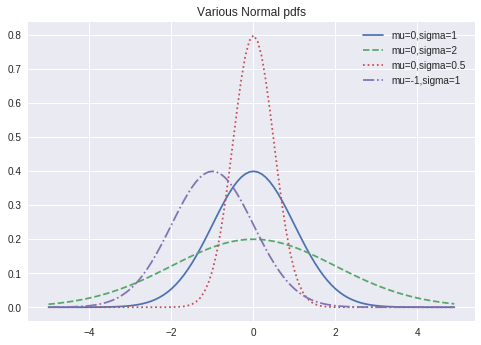

In [0]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [0]:
def normal_cdf(x, mu=0,sigma=1):
    """cummulative density function"""
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

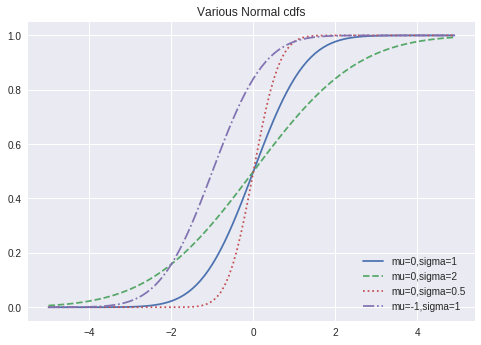

In [0]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [0]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mu + sigma * mid_z

In [0]:
inverse_normal_cdf(0.25)

-0.6744861602783203

In [0]:
inverse_normal_cdf(0.5)

0.0

In [0]:
import math
import random
from collections import Counter
import matplotlib.pyplot as plt


In [0]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [0]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [0]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu=p*n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    # We're using CDF on narrow intervals, maybe because the binomial distribution
    # is discrete?
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys,'.')

    # We can also plot the normal pdf
    ys = [normal_pdf(i, mu, sigma) for i in xs]
    plt.plot(xs,ys)

    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

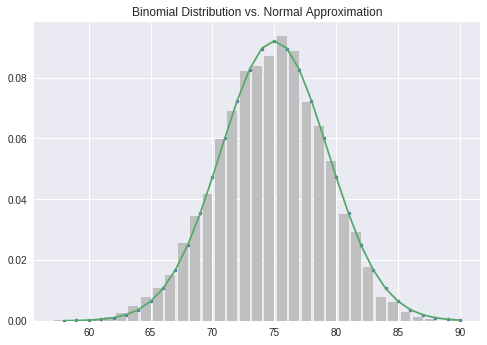

In [0]:
make_hist(0.75, 100, 10000)

# Chapter 7 
Hypothesis And Inference 

In [0]:
import math, random
import matplotlib.pyplot as plt

In [0]:
def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

In [0]:
# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf
# it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)
# it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)
# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)
def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)
def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

In [0]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

In [0]:
normal_two_sided_bounds(0.95, mu_0, sigma_0) # (469, 531)

(469.01026640487555, 530.9897335951244)

In [0]:
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability # 0.887
power


0.8865480012953671

In [0]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)
type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability # 0.936
power

0.9363794803307173

In [0]:
def two_sided_p_value(x, mu=0, sigma=1):
  if x >= mu:
  # if x is greater than the mean, the tail is what's greater than x
    return 2 * normal_probability_above(x, mu, sigma)
  else:
  # if x is less than the mean, the tail is what's less than x
    return 2 * normal_probability_below(x, mu, sigma)


In [0]:
two_sided_p_value(529.5, mu_0, sigma_0) # 0.062


0.06207721579598857

In [0]:
extreme_value_count = 0
for _ in range(100000):
  num_heads = sum(1 if random.random() < 0.5 else 0 # count # of heads
                    for _ in range(1000)) # in 1000 flips
  if num_heads >= 530 or num_heads <= 470: # and count how often
    extreme_value_count += 1 # the # is 'extreme'
print (extreme_value_count / 100000 )# 0.062


0.06249


In [0]:
two_sided_p_value(531.5, mu_0, sigma_0) # 0.0463

0.046345287837786575

In [0]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below


In [0]:
upper_p_value(524.5, mu_0, sigma_0) # 0.061


0.06062885772582083

In [0]:
upper_p_value(526.5, mu_0, sigma_0) # 0.047

0.04686839508859242

In [0]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
sigma

0.015791611697353755

In [0]:
normal_two_sided_bounds(0.95, mu, sigma) # [0.4940, 0.5560]

(0.4940490278129096, 0.5559509721870904)

In [0]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000) # 0.0158
print(sigma)
normal_two_sided_bounds(0.95, mu, sigma) # [0.5091, 0.5709]

0.015760710643876435


(0.5091095927295919, 0.5708904072704082)

In [0]:
def run_experiment():
  """flip a fair coin 1000 times, True = heads, False = tails"""
  return [random.random() < 0.5 for _ in range(1000)]
def reject_fairness(experiment):
  """using the 5% significance levels"""
  num_heads = len([flip for flip in experiment if flip])
  return num_heads < 469 or num_heads > 531
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment 
                      for experiment in experiments 
                      if reject_fairness(experiment)])
print (num_rejections) # 46

46


In [0]:
def estimated_parameters(N, n):
  p = n / N
  sigma = math.sqrt(p * (1 - p) / N)
  return p, sigma

In [0]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
  p_A, sigma_A = estimated_parameters(N_A, n_A)
  p_B, sigma_B = estimated_parameters(N_B, n_B)
  return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [0]:
z = a_b_test_statistic(1000, 200, 1000, 180)
z

-1.1403464899034472

In [0]:
two_sided_p_value(z)

0.254141976542236

In [0]:
z = a_b_test_statistic(1000, 200, 1000, 150) # -2.94
print(z)
two_sided_p_value(z) 

-2.948839123097944


0.003189699706216853

In [0]:
def B(alpha, beta):
  """a normalizing constant so that the total probability is 1"""
  return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)
def beta_pdf(x, alpha, beta):
  if x < 0 or x > 1: # no weight outside of [0, 1]
    return 0
  return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)